# Lead Score buses empresas

In [1]:
#referencias:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
#https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
#https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b


#Area de Analytics - Comercial Kaufmann
#creado por Sebastian Alibaud



# CARGA DE PAQUETES

In [2]:
# quitamos alertas porfavor!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ploteos
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,recall_score
from sklearn.metrics import f1_score,precision_score,roc_auc_score,average_precision_score


#modelos
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
#from sklearn.linear_model import RidgeClassifier,SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,average_precision_score
#from sklearn.neighbors import NearestNeighbors
import xgboost as xgb


### Funciones utiles

In [4]:
#funciones para medir

def mediciones(x_train,y_train,x_test,y_test,model):
    a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    dd = int(f1_score(y_test,model.predict(x_test))*1000)/1000
    ee = int(f1_score(y_train,model.predict(x_train))*1000)/1000
    e = {'Entrenamiento':[a,b,aa,ee],
         'Testeo':[c,d,cc,dd]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall","roc","f1"])
    matrix=confusion_matrix(y_test,model.predict(x_test))
    TP=matrix[1,1]
    TN=matrix[0,0]
    FP=matrix[0,1]
    FN=matrix[1,0]
    ma = {'Prediccion falso':[TN,FN],
         'Prediccion verdadero':[FP,TP]}
    i = pd.DataFrame(data=ma,index=["Actual falsa","Actual verdadera"])
    print("Matriz de confusion:\n",i)
    return f



#print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
#fig= plt.figure(figsize=(6,3))# to plot the graph
#print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
#print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
#print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
#print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal


def mediciones2(x_train,y_train,x_test,y_test,model):
    #a = int(accuracy_score(y_train,model.predict(x_train))*1000)/1000
    #b = int(recall_score(y_train,model.predict(x_train))*1000)/1000
    c = int(accuracy_score(y_test,model.predict(x_test))*1000)/1000
    d = int(recall_score(y_test,model.predict(x_test))*1000)/1000
    #aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    #cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Testeo':[c,d]}
    f = pd.DataFrame(data=e,index=["Accuracy","recall"])
    return f

def roc_(x_train,y_train,x_test,y_test,model):
    aa = int(roc_auc_score(y_train,model.predict_proba(x_train)[:,1])*1000)/1000
    cc = int(roc_auc_score(y_test,model.predict_proba(x_test)[:,1])*1000)/1000
    e = {'Entrenamiento':[a],
         'Testeo':[c]}
    f = pd.DataFrame(data=e,index=["roc-auc"])
    return f

# Preparación de datos
### LECTURA DE BASE BRUTA DESDE SAS


La base de datos se obtiene desde el SAS guardado en la carpeta diaria de Customer analytics, esta base considera todas las ofertas realizadas en kaufmann a clientes que se encuentran en el perfil, se cruza con información de venta, rvm, post venta y datos del SII.


Para el caso de puesta en prd, se consideran todas las empresas presentes en SII mas todos los clientes kaufman, mas todas las personas que están en rvm.


* Periodo de información = 2018 y 2019.
* Modelos: Utilitarios.
* Tipo Cliente: Persona y empresa.

Fuente sii:
http://www.sii.cl/sobre_el_sii/nominapersonasjuridicas.html



In [5]:
#----------------------#
# carga de informacion #
#----------------------#
#lectura de datos
df = pd.read_sas(r"file:\\10.1.1.145\datos\ANALISIS\CHILE\IMPORTER_MARKETING_CUSTOMER_ANALYTICS\DATOS\LEAD_SCORE_UTILITARIOS_PREV1.sas7bdat",
                    format='sas7bdat',encoding='latin1')

df = df[df['TIPO_CLIENTE']!='PERSONA']
df=df[df['CATEGORIA']=='BUS']

df=df.drop(['TIPO_CLIENTE'], axis=1)

In [6]:
df=df.drop(["CATEGORIA"], axis=1)
df.shape

(7311, 33)

### LIMPIEZA DE DATOS GENERAL

In [7]:
#porcentaje de missing
#round(100*(df.isnull().sum()/len(df.index)), 2)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 34.73
NUM_TRABAJADORES            34.73
TOTAL_UTILITARIOS           44.88
UTILITARIOS_EXCLUSION       57.56
RELEVANTE_BUSES             75.71
RELEVANTE_CAMIONES          84.20
RELEVANTE_RODADOS           94.62
RELEVANTE_VANS              58.45
RELEVANTE_CARGA             81.52
RELEVANTE_PASAJERA          67.56
RELEVANTE_PESADO            88.48
RELEVANTE_CAMIONETA         94.82
RELEVANTE_MEDIANO           90.29
RELEVANTE_OTROS             49.71
RELEVANTE_LIVIANO           95.53
RELEVANTE_CAMIONETA_DCAB    98.41
RELEVANTE_FORESTAL          97.96
RELEVANTE_CAMABAJA          97.36
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 44.88
ANTIGUEDAD_FLOTA            44.88
COMPRO_NUM                   0.00
CAMPANAS_U180D              79.70
CAMPANAS_U180D_C            79.93
SERVICIOS_PV                 0.00
REGION                       0.82
USADO_NUEVO                  0.00
DESC_TIPO_VEHI

In [8]:
#no elimino estos datos porque vienen de rvm, miss significa que no tiene
df['RELEVANTE_BUSES'] = df['RELEVANTE_BUSES'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_RODADOS'] = df['RELEVANTE_RODADOS'].replace(np.nan,0)
df['RELEVANTE_VANS'] = df['RELEVANTE_VANS'].replace(np.nan,0)
df['RELEVANTE_CARGA'] = df['RELEVANTE_CARGA'].replace(np.nan,0)
df['RELEVANTE_PASAJERA'] = df['RELEVANTE_PASAJERA'].replace(np.nan,0)
df['RELEVANTE_PESADO'] = df['RELEVANTE_PESADO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA'] = df['RELEVANTE_CAMIONETA'].replace(np.nan,0)
df['RELEVANTE_MEDIANO'] = df['RELEVANTE_MEDIANO'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)
df['RELEVANTE_LIVIANO'] = df['RELEVANTE_LIVIANO'].replace(np.nan,0)
df['RELEVANTE_CAMIONETA_DCAB'] = df['RELEVANTE_CAMIONETA_DCAB'].replace(np.nan,0)
df['RELEVANTE_FORESTAL'] = df['RELEVANTE_FORESTAL'].replace(np.nan,0)
df['RELEVANTE_CAMABAJA'] = df['RELEVANTE_CAMABAJA'].replace(np.nan,0)
#porcentaje de missing
round(100*(df.isnull().sum()/len(df.index)), 2)

RUBRO_ECON                   0.00
ANTIGUEDAD_E                 0.00
TRAMO_VENTA                 34.73
NUM_TRABAJADORES            34.73
TOTAL_UTILITARIOS           44.88
UTILITARIOS_EXCLUSION       57.56
RELEVANTE_BUSES              0.00
RELEVANTE_CAMIONES           0.00
RELEVANTE_RODADOS            0.00
RELEVANTE_VANS               0.00
RELEVANTE_CARGA              0.00
RELEVANTE_PASAJERA           0.00
RELEVANTE_PESADO             0.00
RELEVANTE_CAMIONETA          0.00
RELEVANTE_MEDIANO            0.00
RELEVANTE_OTROS              0.00
RELEVANTE_LIVIANO            0.00
RELEVANTE_CAMIONETA_DCAB     0.00
RELEVANTE_FORESTAL           0.00
RELEVANTE_CAMABAJA           0.00
MARCA_AGRUPADA               0.00
FLOTA_NUEVA                 44.88
ANTIGUEDAD_FLOTA            44.88
COMPRO_NUM                   0.00
CAMPANAS_U180D              79.70
CAMPANAS_U180D_C            79.93
SERVICIOS_PV                 0.00
REGION                       0.82
USADO_NUEVO                  0.00
DESC_TIPO_VEHI

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 15 to 212018
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUBRO_ECON                7311 non-null   object 
 1   ANTIGUEDAD_E              7311 non-null   object 
 2   TRAMO_VENTA               4772 non-null   float64
 3   NUM_TRABAJADORES          4772 non-null   float64
 4   TOTAL_UTILITARIOS         4030 non-null   float64
 5   UTILITARIOS_EXCLUSION     3103 non-null   float64
 6   RELEVANTE_BUSES           7311 non-null   float64
 7   RELEVANTE_CAMIONES        7311 non-null   float64
 8   RELEVANTE_RODADOS         7311 non-null   float64
 9   RELEVANTE_VANS            7311 non-null   float64
 10  RELEVANTE_CARGA           7311 non-null   float64
 11  RELEVANTE_PASAJERA        7311 non-null   float64
 12  RELEVANTE_PESADO          7311 non-null   float64
 13  RELEVANTE_CAMIONETA       7311 non-null   float64
 14  RELEV

### LIMPIEZA DE DATOS POR COLUMNA 

#### columnas numericas

In [10]:
#ahora tratare de revisar cada columna para imputar en caso de que se pueda imputar
df[['TRAMO_VENTA','NUM_TRABAJADORES','TOTAL_UTILITARIOS','FLOTA_NUEVA','ANTIGUEDAD_FLOTA','CAMPANAS_U180D',
   'CAMPANAS_U180D_C','NUM_OFERTAS_U12M','COMPRAS_REALIZADAS_U12M']].describe()

,TRAMO_VENTA,NUM_TRABAJADORES,TOTAL_UTILITARIOS,FLOTA_NUEVA,ANTIGUEDAD_FLOTA,CAMPANAS_U180D,CAMPANAS_U180D_C,NUM_OFERTAS_U12M,COMPRAS_REALIZADAS_U12M
count,4772.000000,4772.000000,4030.000000,4030.000000,4030.000000,1484.000000,1467.000000,7311.000000,7311.000000
mean,9.346396,444.035834,29.127047,0.414888,4.337853,4.365903,4.276074,92.616742,24.266037
std,3.577404,1079.696427,104.972822,0.492764,3.629290,5.146427,5.022812,337.274598,61.041261
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,7.000000,11.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,11.000000,38.000000,3.000000,0.000000,3.764706,3.000000,3.000000,7.000000,0.000000
75%,13.000000,226.500000,17.000000,1.000000,6.500000,6.000000,5.000000,34.000000,6.000000
max,13.000000,13148.000000,3817.000000,1.000000,19.000000,50.000000,47.000000,2459.000000,371.000000


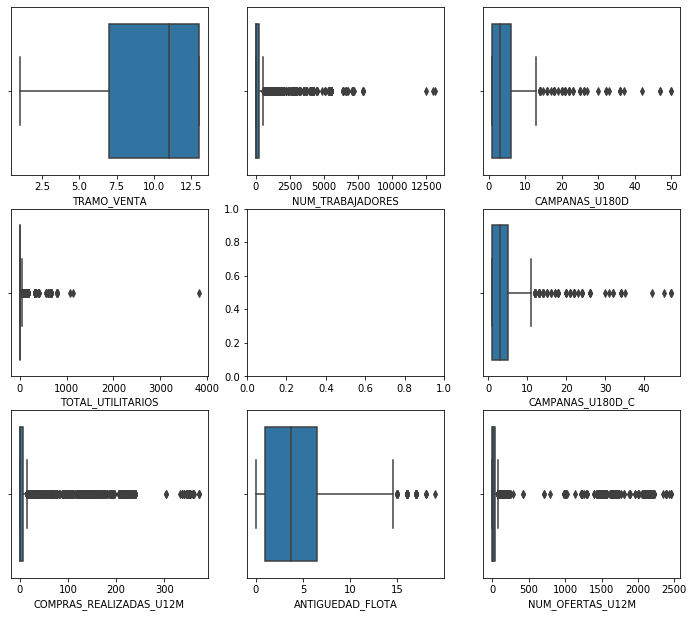

In [11]:
fig, axs = plt.subplots(3,3, figsize = (12,10.5))
plt2 = sns.boxplot(df['TRAMO_VENTA'], ax = axs[0,0])
plt2 = sns.boxplot(df['NUM_TRABAJADORES'], ax = axs[0,1])
plt2 = sns.boxplot(df['TOTAL_UTILITARIOS'], ax = axs[1,0])
plt2 = sns.boxplot(df['ANTIGUEDAD_FLOTA'], ax = axs[2,1])
plt2 = sns.boxplot(df['CAMPANAS_U180D_C'], ax = axs[1,2])
plt2 = sns.boxplot(df['NUM_OFERTAS_U12M'], ax = axs[2,2])
plt2 = sns.boxplot(df['CAMPANAS_U180D'], ax = axs[0,2])
plt2 = sns.boxplot(df['COMPRAS_REALIZADAS_U12M'], ax = axs[2,0])

plt.show()

ahi un exceso de variabilidad en algunas columnas

In [12]:
#estas variables no pueden ser imputadas porque indican que no tienen vehiculos, candidatas a irse de la base!!
df['TOTAL_UTILITARIOS'] = df['TOTAL_UTILITARIOS'].replace(np.nan,0)
df['UTILITARIOS_EXCLUSION'] = df['UTILITARIOS_EXCLUSION'].replace(np.nan,0)
df['RELEVANTE_CAMIONES'] = df['RELEVANTE_CAMIONES'].replace(np.nan,0)
df['RELEVANTE_OTROS'] = df['RELEVANTE_OTROS'].replace(np.nan,0)



df['TRAMO_VENTA'] = df['TRAMO_VENTA'].replace(np.nan, np.mean(df['TRAMO_VENTA']))
df['NUM_TRABAJADORES'] = df['NUM_TRABAJADORES'].replace(np.nan, np.mean(df['NUM_TRABAJADORES']))


### columnas categoricas

In [13]:
df[['MARCA_AGRUPADA','DESC_TIPO_VEHICULO']].describe()

,MARCA_AGRUPADA,DESC_TIPO_VEHICULO
count,7311,7251
unique,2,6
top,MITSUBISHI-FUSO,BUS
freq,4923,6439


In [14]:
avr_mar=pd.DataFrame(df.groupby('MARCA_AGRUPADA')["COMPRO_NUM"].mean())
avr_mar=avr_mar.sort_values("COMPRO_NUM",ascending=False)
avr_mar.head(50)

,COMPRO_NUM
MARCA_AGRUPADA,
MERCEDES-BENZ,0.292714
MITSUBISHI-FUSO,0.082673


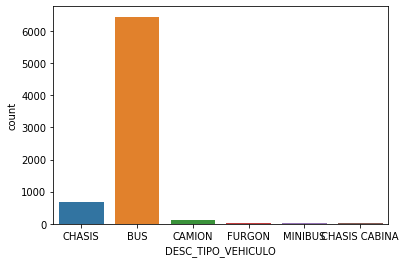

In [15]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'CAMION')
plt1 = sns.countplot(df['DESC_TIPO_VEHICULO'])
plt.show()

In [16]:
df[['FLOTA_NUEVA','ANTIGUEDAD_FLOTA']].describe()

,FLOTA_NUEVA,ANTIGUEDAD_FLOTA
count,4030.000000,4030.000000
mean,0.414888,4.337853
std,0.492764,3.629290
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,3.764706
75%,1.000000,6.500000
max,1.000000,19.000000


In [17]:
# estos valores corresponden a flotas, si estan vacion significa que no tienen flota o bien no tienen flota nueva
df['FLOTA_NUEVA'] = df['FLOTA_NUEVA'].replace(np.nan,0)

#se debe trabajar en esto
df['CAMPANAS_U180D'] = df['CAMPANAS_U180D'].replace(np.nan,0)
df['CAMPANAS_U180D_C'] = df['CAMPANAS_U180D_C'].replace(np.nan,0)
df['ANTIGUEDAD_FLOTA'] = df['ANTIGUEDAD_FLOTA'].replace(np.nan,0)

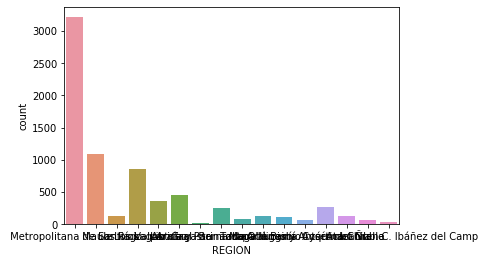

,REGION
count,7251
unique,16
top,Metropolitana de Santiago
freq,3213


In [18]:
plt1 = sns.countplot(df['REGION'])
plt.show(),
df[['REGION']].describe()

In [19]:
df['REGION'] = df['REGION'].replace(np.nan,'NA')

In [20]:
df[['DESC_TIPO_VEHICULO']].describe()

,DESC_TIPO_VEHICULO
count,7311
unique,6
top,BUS
freq,6439


In [21]:
df['DESC_TIPO_VEHICULO'] = df['DESC_TIPO_VEHICULO'].replace(np.nan,'NA')

In [22]:
df[['TIPO_CREDITO_USADO_ANT']].describe()

,TIPO_CREDITO_USADO_ANT
count,4335
unique,7
top,CONTADO
freq,2811


In [23]:
df['TIPO_CREDITO_USADO_ANT'] = df['TIPO_CREDITO_USADO_ANT'].replace(np.nan,'NA')

In [24]:
#cantidad de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 15 to 212018
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUBRO_ECON                7311 non-null   object 
 1   ANTIGUEDAD_E              7311 non-null   object 
 2   TRAMO_VENTA               7311 non-null   float64
 3   NUM_TRABAJADORES          7311 non-null   float64
 4   TOTAL_UTILITARIOS         7311 non-null   float64
 5   UTILITARIOS_EXCLUSION     7311 non-null   float64
 6   RELEVANTE_BUSES           7311 non-null   float64
 7   RELEVANTE_CAMIONES        7311 non-null   float64
 8   RELEVANTE_RODADOS         7311 non-null   float64
 9   RELEVANTE_VANS            7311 non-null   float64
 10  RELEVANTE_CARGA           7311 non-null   float64
 11  RELEVANTE_PASAJERA        7311 non-null   float64
 12  RELEVANTE_PESADO          7311 non-null   float64
 13  RELEVANTE_CAMIONETA       7311 non-null   float64
 14  RELEV

In [25]:
numericas = [['NUM_TRABAJADORES',
'TOTAL_UTILITARIOS',
'UTILITARIOS_EXCLUSION',
'RELEVANTE_BUSES',
'RELEVANTE_CAMIONES',
'RELEVANTE_RODADOS',
'RELEVANTE_VANS',
'RELEVANTE_CARGA',
'RELEVANTE_PASAJERA',
'RELEVANTE_PESADO',
'RELEVANTE_CAMIONETA',
'RELEVANTE_MEDIANO',
'RELEVANTE_OTROS',
'RELEVANTE_LIVIANO',
'RELEVANTE_CAMIONETA_DCAB',
'RELEVANTE_FORESTAL',
'RELEVANTE_CAMABAJA',
'FLOTA_NUEVA',
'ANTIGUEDAD_FLOTA',
'CAMPANAS_U180D',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M',
'CAMPANAS_U180D_C',
'NUM_OFERTAS_U12M',
'COMPRAS_REALIZADAS_U12M']]

df1=df

for i in numericas:
    df1[i]=(df[i]-df1[i].mean())/df1[i].std()

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 15 to 212018
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUBRO_ECON                7311 non-null   object 
 1   ANTIGUEDAD_E              7311 non-null   object 
 2   TRAMO_VENTA               7311 non-null   float64
 3   NUM_TRABAJADORES          7311 non-null   float64
 4   TOTAL_UTILITARIOS         7311 non-null   float64
 5   UTILITARIOS_EXCLUSION     7311 non-null   float64
 6   RELEVANTE_BUSES           7311 non-null   float64
 7   RELEVANTE_CAMIONES        7311 non-null   float64
 8   RELEVANTE_RODADOS         7311 non-null   float64
 9   RELEVANTE_VANS            7311 non-null   float64
 10  RELEVANTE_CARGA           7311 non-null   float64
 11  RELEVANTE_PASAJERA        7311 non-null   float64
 12  RELEVANTE_PESADO          7311 non-null   float64
 13  RELEVANTE_CAMIONETA       7311 non-null   float64
 14  RELEV

## Exploración
Practicamente todos los grupos tienen una baja conversion pero existen diferencias en promedio

### Análisis por columna

 la variable COMPRO_NUM corresponde a una variable indicadora de si compra o no lo ofertado
#(1) compra (0) no compra

In [27]:
conversion = (sum(df1['COMPRO_NUM'])/len(df1['COMPRO_NUM'].index))*100
conversion

15.127889481603063

Una conversion tan baja requiere balance de la información

#### RUBRO_ECON

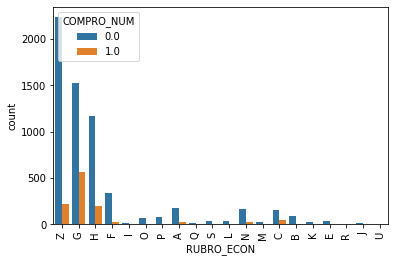

In [28]:
sns.countplot(x = "RUBRO_ECON", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show()

In [29]:
df1.groupby('RUBRO_ECON')["COMPRO_NUM"].mean() 

RUBRO_ECON
A    0.102041
B    0.032609
C    0.238806
E    0.139535
F    0.062842
G    0.268234
H    0.142857
I    0.000000
J    0.000000
K    0.000000
L    0.000000
M    0.000000
N    0.108696
O    0.052632
P    0.072289
Q    0.000000
R    0.000000
S    0.050000
U    0.000000
Z    0.089947
Name: COMPRO_NUM, dtype: float64

#### ANTIGUEDAD_E

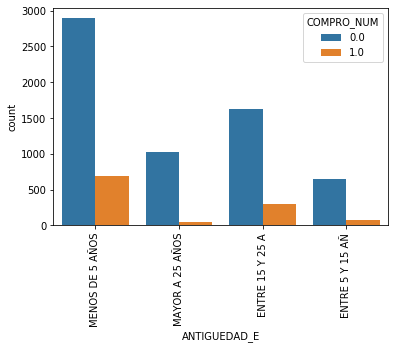

ANTIGUEDAD_E
ENTRE 15 Y 25 A    0.155360
ENTRE 5 Y 15 AÑ    0.095967
MAYOR A 25 AÑOS    0.048893
MENOS DE 5 AÑOS    0.191222
Name: COMPRO_NUM, dtype: float64

In [30]:
# la variable la optimize desde sas
sns.countplot(x = "ANTIGUEDAD_E", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('ANTIGUEDAD_E')["COMPRO_NUM"].mean() 


#### TRAMO_VENTA

In [31]:
df1.groupby('TRAMO_VENTA')["COMPRO_NUM"].mean() 

TRAMO_VENTA
1.000000     0.081633
2.000000     0.048387
3.000000     0.062500
4.000000     0.055749
5.000000     0.101504
6.000000     0.070922
7.000000     0.084507
8.000000     0.088235
9.000000     0.079070
9.346396     0.092556
10.000000    0.283784
11.000000    0.387222
12.000000    0.375000
13.000000    0.103175
Name: COMPRO_NUM, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

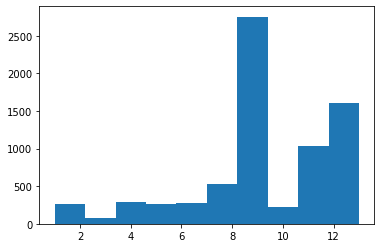

In [32]:
plt.hist(df1["TRAMO_VENTA"])
plt.show

### Numero de trabajadores

<function matplotlib.pyplot.show(*args, **kw)>

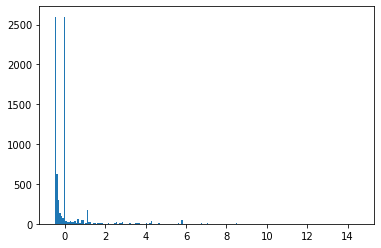

In [33]:
plt.hist(df1["NUM_TRABAJADORES"],bins=200)
plt.show



Existen aoutliers es esta variable

### REGION

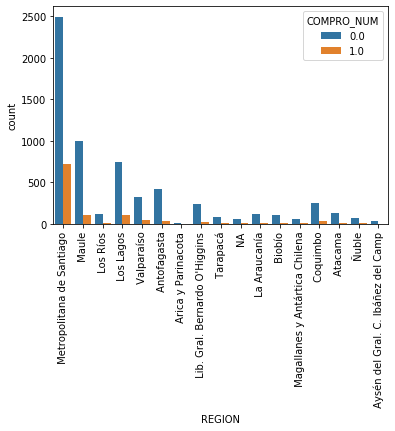

REGION
NA                                     0.066667
 Antofagasta                           0.069351
 Arica y Parinacota                    0.000000
 Atacama                               0.045455
 Aysén del Gral. C. Ibáñez del Camp    0.060606
 Biobío                                0.045045
 Coquimbo                              0.105839
 La Araucanía                          0.109375
 Lib. Gral. Bernardo O'Higgins         0.067729
 Los Lagos                             0.129108
 Los Ríos                              0.088000
 Magallanes y Antártica Chilena        0.131148
 Maule                                 0.094150
 Metropolitana de Santiago             0.223156
 Tarapacá                              0.062500
 Valparaíso                            0.112329
 Ñuble                                 0.041667
Name: COMPRO_NUM, dtype: float64

In [34]:
# la variable la optimize desde sas
sns.countplot(x = "REGION", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('REGION')["COMPRO_NUM"].mean() 


### Tipo credito usado anteriormente

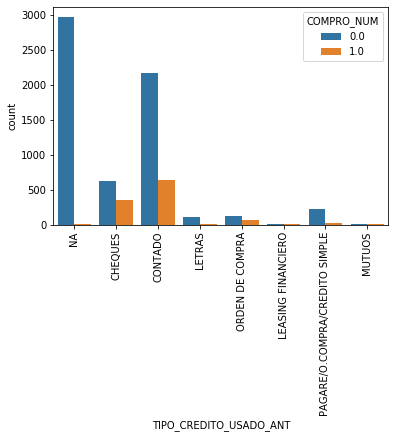

TIPO_CREDITO_USADO_ANT
CHEQUES                           0.362887
CONTADO                           0.228033
LEASING FINANCIERO                0.565217
LETRAS                            0.098214
MUTUOS                            0.250000
NA                                0.003024
ORDEN DE COMPRA                   0.337143
PAGARE/O.COMPRA/CREDITO SIMPLE    0.083333
Name: COMPRO_NUM, dtype: float64

In [35]:
sns.countplot(x = "TIPO_CREDITO_USADO_ANT", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('TIPO_CREDITO_USADO_ANT')["COMPRO_NUM"].mean() 

Esto tiene poca logica, pero se usa, si el cliente compra antes, tengo el tipo de credito que ocupa, pero voy a agrupar

In [36]:
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('PAGARE/O.COMPRA/CREDITO SIMPLE','CREDITO')
df1['TIPO_CREDITO_USADO_ANT'] = df1['TIPO_CREDITO_USADO_ANT'].replace('LEASING FINANCIERO','LEASING')

### Ofertas realizadas anteriormente

-0.04139724678381833

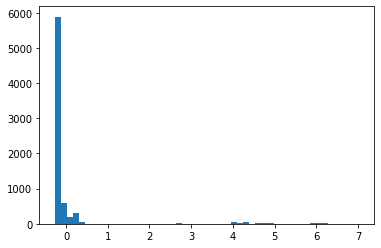

In [37]:
plt.hist(df1["NUM_OFERTAS_U12M"],bins=50)
plt.show

df1['NUM_OFERTAS_U12M'].corr(df1["COMPRO_NUM"])

### Servicios PV

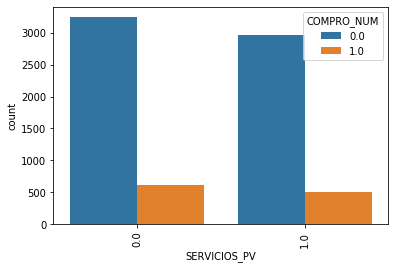

SERVICIOS_PV
0.0    0.157021
1.0    0.144881
Name: COMPRO_NUM, dtype: float64

In [38]:
sns.countplot(x = "SERVICIOS_PV", hue = "COMPRO_NUM", data = df1)
xticks(rotation = 90)
plt.show(),
df1.groupby('SERVICIOS_PV')["COMPRO_NUM"].mean() 

## Dummificacion de variables

In [39]:
def variables_dummy(dataset,variable):
    cat_dummies = pd.get_dummies(dataset[variable],prefix=variable)
    #.iloc[:,1:]
    data_new = dataset.join(cat_dummies)
    dataset = data_new.drop([variable],axis=1)
    return dataset

In [40]:
df3=df1

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 15 to 212018
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RUBRO_ECON                7311 non-null   object 
 1   ANTIGUEDAD_E              7311 non-null   object 
 2   TRAMO_VENTA               7311 non-null   float64
 3   NUM_TRABAJADORES          7311 non-null   float64
 4   TOTAL_UTILITARIOS         7311 non-null   float64
 5   UTILITARIOS_EXCLUSION     7311 non-null   float64
 6   RELEVANTE_BUSES           7311 non-null   float64
 7   RELEVANTE_CAMIONES        7311 non-null   float64
 8   RELEVANTE_RODADOS         7311 non-null   float64
 9   RELEVANTE_VANS            7311 non-null   float64
 10  RELEVANTE_CARGA           7311 non-null   float64
 11  RELEVANTE_PASAJERA        7311 non-null   float64
 12  RELEVANTE_PESADO          7311 non-null   float64
 13  RELEVANTE_CAMIONETA       7311 non-null   float64
 14  RELEV

In [41]:
tabla=variables_dummy(df3,"ANTIGUEDAD_E")
tabla=variables_dummy(tabla,"DESC_TIPO_VEHICULO")
tabla=variables_dummy(tabla,"MARCA_AGRUPADA")
tabla=variables_dummy(tabla,"RUBRO_ECON")
tabla=variables_dummy(tabla,"REGION")
#tabla=variables_dummy(tabla,"COMUNA_CRM")
tabla=variables_dummy(tabla,"USADO_NUEVO")
tabla=variables_dummy(tabla,"TIPO_CREDITO_USADO_ANT")


In [42]:
y=tabla["COMPRO_NUM"]
x=tabla.drop(["COMPRO_NUM"], axis=1)

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7311 entries, 15 to 212018
Data columns (total 84 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   TRAMO_VENTA                                 7311 non-null   float64
 1   NUM_TRABAJADORES                            7311 non-null   float64
 2   TOTAL_UTILITARIOS                           7311 non-null   float64
 3   UTILITARIOS_EXCLUSION                       7311 non-null   float64
 4   RELEVANTE_BUSES                             7311 non-null   float64
 5   RELEVANTE_CAMIONES                          7311 non-null   float64
 6   RELEVANTE_RODADOS                           7311 non-null   float64
 7   RELEVANTE_VANS                              7311 non-null   float64
 8   RELEVANTE_CARGA                             7311 non-null   float64
 9   RELEVANTE_PASAJERA                          7311 non-null   float64
 10  RELEVANTE

# Inicio de modelamiento

### Datos entrenamiento y testeo

como esta desbalanceado, primero divido la muestra pero por estratos

In [44]:
x_res,x_test,y_res,y_test=train_test_split(x,y,test_size=0.2,random_state=1010)

Revisamos como quedan las separaciones

In [45]:
y_res.mean(),y_test.mean(),y_res.shape,y_test.shape

(0.14774281805745554, 0.16541353383458646, (5848,), (1463,))

Tenemos un problema con datos desbalanceados, por lo que revisemos como se comporta este desbalance utilizando un modelo sde random forest como base inicial

In [46]:
modelo_rfc = RandomForestClassifier().fit(x_res, y_res)

In [47]:
#evaluacion del modelo
mediciones(x_res,y_res,x_test,y_test,modelo_rfc)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1148                    73
Actual verdadera               134                   108


,Entrenamiento,Testeo
Accuracy,0.954,0.858
recall,0.821,0.446
roc,0.988,0.853
f1,0.842,0.510


El recall es muy bajo y se ve afectado el f1, es necesario balancear los datos

### Balanceo de datos de entrenamiento

Tengo la opcion de bajar o subir la muestra, a modo de no perder informacion se sube

In [48]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
nm = SMOTE(random_state = 10101) 
#nm = NearMiss(random_state = 10101)

Using TensorFlow backend.


In [49]:
x_train,y_train=nm.fit_resample(x_res,y_res)

Reviso dimenciones nuevamente

In [50]:
y_res.shape, y_res.mean(), y_train.shape,y_train.mean()

((5848,), 0.14774281805745554, (9968,), 0.5)

# Modelamiento con datos balanceados

La estrategia en este caso es utilizar regresion logistica, en el caso de obtener un pobre ajuste, se utilitan varios modelos para probar

## Regresion logistica como modelo base

Utilizo regresion loistica y una busqueda por gridsearch para encontrar mejores hiperparametros

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,3), "penalty":["l2"]}

logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring='f1',verbose=0)

In [52]:
logreg_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e+00, 1.e+03]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [53]:
logreg_cv.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [54]:
logreg=LogisticRegression(C=1000,penalty='l2')
logreg.fit(x_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
mediciones(x_train,y_train,x_test,y_test,logreg)   

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1065                   156
Actual verdadera                66                   176


,Entrenamiento,Testeo
Accuracy,0.880,0.848
recall,0.900,0.727
roc,0.950,0.898
f1,0.883,0.613


Se aprecia un claro bajo ajuste, veamos si aplicamos otros modelos podemos mejorar esto (al menos el recall y press deben estar sobre 50%)

## Multi-modelos

Para evita probar uno a uno los modelos, se seleccionan varios y luego se verifica los con mejor rendimiento para hacer una busqueda ampliada de los mejores con gridsearch

In [56]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          
              

modelos = [["LR","SVC","RF","TREE","MLP","GBOOST","ADABOOST","GRBOOST"],
           [
            LogisticRegression(C=1000,penalty='l2'),  
            svm.SVC(max_iter=100),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            MLPClassifier(),
            GaussianNB(),
            AdaBoostClassifier(),
            GradientBoostingClassifier()]
          ]
warnings.filterwarnings("ignore")

resultados=[]
predicion=[]
error=[]
precision=[]
a=0
for i in modelos[1]:
    ajuste=i.fit(x_train,y_train)
    resultados.append(ajuste)
    predicion.append(ajuste.predict(x_test))
    er = i.score(x_test,y_test)
    error.append(er)
    precision.append(ajuste.score(x_test , y_test))
    print("\n modelo:",modelos[0][a])
    print(mediciones2(x_train,y_train,x_test,y_test,ajuste))
    print("f1 score:",int(f1_score(y_test,ajuste.predict(x_test))*1000)/1000)
    if modelos[0][a]!='SVC':
        print("roc-auc:", roc_auc_score(y_test,ajuste.predict_proba(x_test)[:,1]))
    print(confusion_matrix(y_test,ajuste.predict(x_test)))
    a=a+1


 modelo: LR
          Testeo
Accuracy   0.848
recall     0.727
f1 score: 0.613
roc-auc: 0.8988652439065663
[[1065  156]
 [  66  176]]

 modelo: SVC
          Testeo
Accuracy   0.276
recall     0.933
f1 score: 0.299
[[ 178 1043]
 [  16  226]]

 modelo: RF
          Testeo
Accuracy   0.859
recall     0.549
f1 score: 0.563
roc-auc: 0.8631608693592164
[[1124   97]
 [ 109  133]]

 modelo: TREE
          Testeo
Accuracy   0.848
recall     0.508
f1 score: 0.525
roc-auc: 0.7505753311538437
[[1118  103]
 [ 119  123]]

 modelo: MLP
          Testeo
Accuracy   0.876
recall     0.599
f1 score: 0.617
roc-auc: 0.8601082299429407
[[1138   83]
 [  97  145]]

 modelo: GBOOST
          Testeo
Accuracy   0.670
recall     0.921
f1 score: 0.48
roc-auc: 0.7765227661921875
[[758 463]
 [ 19 223]]

 modelo: ADABOOST
          Testeo
Accuracy   0.813
recall     0.785
f1 score: 0.581
roc-auc: 0.9042039785841439
[[1000  221]
 [  52  190]]

 modelo: GRBOOST
          Testeo
Accuracy   0.853
recall     0.702
f1 sc

Siguiente paso es usar gridsearch para buscar la mejor version de cada uno usando como referencia para los mejores en f1 (arbol de decision, random forest, mlp, adaboost)

## Tree Clasificador Tunning

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,8,1)), 
              "min_samples_leaf": list(range(5,18,1))}

tree_cv = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3,n_jobs=-1,verbose=10).fit(x_train,y_train)


Fitting 3 folds for each of 182 candidates, totalling 546 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1915s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 259 tas

In [58]:
mediciones(x_train,y_train,x_test,y_test,tree_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                   977                   244
Actual verdadera                61                   181


,Entrenamiento,Testeo
Accuracy,0.852,0.791
recall,0.900,0.747
roc,0.932,0.889
f1,0.859,0.542


No mejoro mucho respecto a lo que ya estaba ajustado (claso sobre ajuste)

## Random Forest Tunning

In [59]:
## from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [25,30,50],
    'max_depth'         : [8,10,15],
    'random_state'      : [0]}

rf_cv = GridSearchCV(RandomForestClassifier(), parameters, cv=3, n_jobs=-1,verbose=10).fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    1.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.1s finished


In [60]:
rf_cv.best_params_

{'max_depth': 15, 'n_estimators': 50, 'random_state': 0}

In [61]:
mediciones(x_train,y_train,x_test,y_test,rf_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1102                   119
Actual verdadera                88                   154


,Entrenamiento,Testeo
Accuracy,0.952,0.858
recall,0.974,0.636
roc,0.986,0.882
f1,0.953,0.598


Los modelos que revisare en mayor profundidad son la rn, adaboost y randomforest

## Adaboost con grid search

In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
gs=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=10)


#print(gs.best_estimator_)

In [95]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:  2.9min remaining:   49.8s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  3.3min remaining:   24.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [96]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [97]:
mediciones(x_train,y_train,x_test,y_test,gs)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1076                   145
Actual verdadera                67                   175


,Entrenamiento,Testeo
Accuracy,0.894,0.855
recall,0.922,0.723
roc,0.957,0.907
f1,0.897,0.622


Teniendo en cuenta los ajustes actuales es un buen ajuste pero el recall es muy bajo, veamos mas opciones

## GradientBoostingClassifier

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

grd=GradientBoostingClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
grd_cv=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=10)



In [118]:
grd_cv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:  3.5min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  4.2min remaining:   31.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [119]:
grd_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [120]:
mediciones(x_train,y_train,x_test,y_test,grd_cv)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1076                   145
Actual verdadera                67                   175


,Entrenamiento,Testeo
Accuracy,0.894,0.855
recall,0.922,0.723
roc,0.957,0.907
f1,0.897,0.622


Mejora el recall pero caemos en el accuracy, igualmente roc esta muy bueno

Ya tengo la mejor version de estos 3 modelos, antes de escojer uno de ellos ¿juntemoslos todos y veamos si la union de todos es mejor que uno solo?

In [70]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

modelos =[('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))),
('mlp',MLPClassifier(alpha=0.1,hidden_layer_sizes=14,random_state= 10101,solver='lbfgs')),
('rfc',RandomForestClassifier(max_depth=15,n_estimators=50,random_state=0))]

modelo_salida = LogisticRegression(C= 1000, penalty= 'l2')

#voy a forzarlo a usar las variables predictoras con las predichas
stack=StackingClassifier(estimators=modelos, final_estimator=modelo_salida,n_jobs=1,passthrough=True,verbose=10)

stack.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

StackingClassifier(cv=None,
                   estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=20,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurity_decrease=0.0,
                                                                                         min_impurity_spl

In [71]:
mediciones(x_train,y_train,x_test,y_test,stack)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1117                   104
Actual verdadera                99                   143


,Entrenamiento,Testeo
Accuracy,0.962,0.861
recall,0.979,0.590
roc,0.993,0.888
f1,0.963,0.584


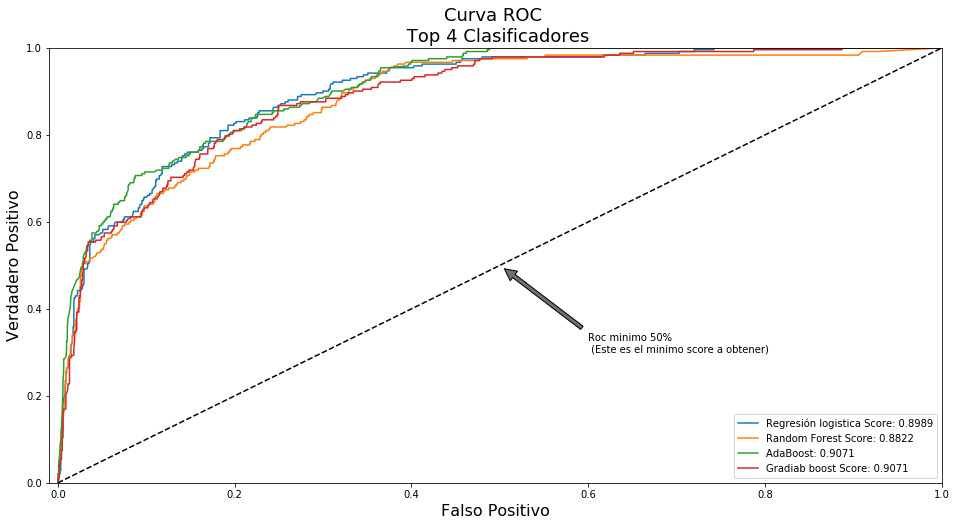

In [121]:
log_reg_pred = logreg_cv.predict_proba(x_test)[:,1]
rf_pred = rf_cv.predict_proba(x_test)[:,1]
ada_pred = gs.predict_proba(x_test)[:,1]
grd_pred = grd_cv.predict_proba(x_test)[:,1]

log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, rf_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, ada_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,rn_pred)


plt.figure(figsize=(16,8))
plt.title('Curva ROC \n Top 4 Clasificadores', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Regresión logistica Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
plt.plot(svc_fpr, svc_tpr, label='AdaBoost: {:.4f}'.format(roc_auc_score(y_test, ada_pred)))
plt.plot(tree_fpr, tree_tpr, label='Gradiab boost Score: {:.4f}'.format(roc_auc_score(y_test, grd_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Falso Positivo', fontsize=16)
plt.ylabel('Verdadero Positivo', fontsize=16)
plt.annotate('Roc minimo 50% \n (Este es el minimo score a obtener)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
    
plt.show()

# Conclusión Buses

En todos los modelos balaneados es posible apreciar un sobre ajuste de los valores, sin embargo es importante indicar que para el problema en cuestion es prioritario no desechar lead buenos e intentar desechar lead malos. por este motivo busco el mejor equilibrio entre recall y accuracy, evitando descuidar el presicion.

Tal contexto lleva a dejar al modelo RF con el mejor comportamiento.

Confusion matrix Random Forest:
 [[1076  145]
 [  67  175]]


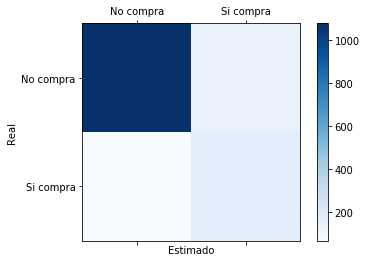

In [122]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=gs.predict(x_test))
print('Confusion matrix Random Forest:\n', conf_mat)

labels = ['No compra', 'Si compra']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.show()

# Exportación del modelo

In [127]:
import pickle

filename = 'lead_score_buses_empresa_modelo.sav'

pickle.dump(gs, open(filename, 'wb'))

In [124]:
from sklearn.neighbors import KNeighborsClassifier


k_range = list(range(5,20))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [125]:
mediciones(x_train,y_train,x_test,y_test,grid)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1108                   113
Actual verdadera               138                   104


,Entrenamiento,Testeo
Accuracy,0.964,0.828
recall,0.943,0.429
roc,0.996,0.756
f1,0.963,0.453


Reviso importancia de cada variable

In [128]:
for feat, importance in zip(x_train.columns, gs.best_estimator_.feature_importances_):
    print ('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: TRAMO_VENTA, importance: 0.015
feature: NUM_TRABAJADORES, importance: 0.0305
feature: TOTAL_UTILITARIOS, importance: 0.034
feature: UTILITARIOS_EXCLUSION, importance: 0.096
feature: RELEVANTE_BUSES, importance: 0.029
feature: RELEVANTE_CAMIONES, importance: 0.032
feature: RELEVANTE_RODADOS, importance: 0.007
feature: RELEVANTE_VANS, importance: 0.0275
feature: RELEVANTE_CARGA, importance: 0.0045
feature: RELEVANTE_PASAJERA, importance: 0.018
feature: RELEVANTE_PESADO, importance: 0.013
feature: RELEVANTE_CAMIONETA, importance: 0.004
feature: RELEVANTE_MEDIANO, importance: 0.001
feature: RELEVANTE_OTROS, importance: 0.0015
feature: RELEVANTE_LIVIANO, importance: 0.004
feature: RELEVANTE_CAMIONETA_DCAB, importance: 0.0005
feature: RELEVANTE_FORESTAL, importance: 0.0
feature: RELEVANTE_CAMABAJA, importance: 0.0015
feature: FLOTA_NUEVA, importance: 0.002
feature: ANTIGUEDAD_FLOTA, importance: 0.0155
feature: CAMPANAS_U180D, importance: 0.009
feature: CAMPANAS_U180D_C, importance: 

In [153]:
from itertools import accumulate
importancia= pd.DataFrame(list(zip(x_train.columns, gs.best_estimator_.feature_importances_)),columns =['variable','importancia'])
importancia2 = importancia.sort_values(by=['importancia'],ascending=0)
importancia2["acumulado"]=list(accumulate(importancia2["importancia"]))

In [167]:
listado=importancia2[importancia2['acumulado']<=0.95]["variable"]

In [168]:
gs.fit(x_test[listado],y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:   22.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:   25.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [169]:
mediciones(x_train[listado],y_train,x_test[listado],y_test,gs)

Matriz de confusion:
                   Prediccion falso  Prediccion verdadero
Actual falsa                  1190                    31
Actual verdadera               104                   138


,Entrenamiento,Testeo
Accuracy,0.719,0.907
recall,0.485,0.570
roc,0.887,0.937
f1,0.634,0.671
